# Library

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn

# Load CSV file from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Machine Learning Data/home_data.csv'
house = pd.read_csv(path)

In [4]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Plotting Scatterplot

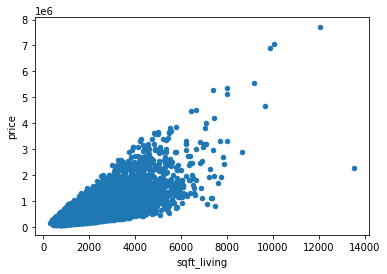

In [5]:
house.plot(kind='scatter',x='sqft_living',y='price')

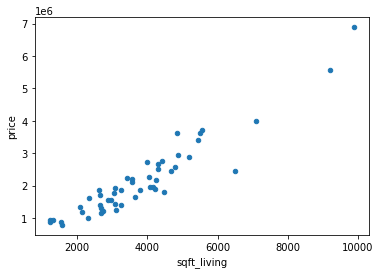

In [6]:
seattle = house.loc[house['zipcode'] == 98039]
seattle.plot(kind='scatter',x='sqft_living',y='price')

# Splitting dataset into training set and test set

In [7]:
X_train , X_test , y_train, y_test = train_test_split(house.sqft_living,house.price, test_size=0.2)

## Plotting training set and test set

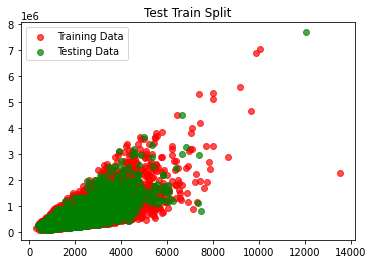

In [8]:
plt.scatter(X_train,y_train,label='Training Data',color='r',alpha=.7)
plt.scatter(X_test,y_test,label='Testing Data',color='g',alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

# Developing Linear Model with one feature

In [9]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

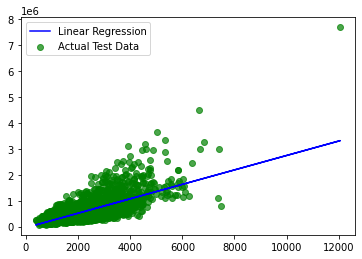

In [10]:
prediction = LR.predict(X_test.values.reshape(-1,1))

#Plot
plt.plot(X_test,prediction,label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g',alpha=.7)
plt.legend()
plt.show()

In [11]:
print(LR.coef_)
print(LR.intercept_)

[278.92370552]
-40367.6219704299


## Prediction Test

In [12]:
LR.predict(np.array([[2400]]))[0]

629049.2712830902

## Score

In [13]:
# Score this model
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.49577940931161024

# Developing Linear Model with multiple feature

In [14]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## From the dataset to make a model, 'id' and 'date' are not necessary for training dataset

In [15]:
house_data = house.copy()
del house_data['id']
del house_data['date']

## Independent variables is all features except 'price'
## 'price' is what I want to predict so it is dependent variable

In [16]:
X_train , X_test , y_train, y_test = train_test_split(house_data.values[:,1:],house_data.price,test_size = 0.2)

In [17]:
multipleLR = LinearRegression()

In [18]:
multipleLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
multipleLR.coef_ 

array([-4.08362077e+04,  4.30353093e+04,  1.15913827e+02,  1.23701298e-01,
        4.52898710e+03,  5.95590380e+05,  5.07223082e+04,  2.48857736e+04,
        9.38715338e+04,  7.45396077e+01,  4.13742189e+01, -2.61189573e+03,
        2.11992508e+01, -5.62248856e+02,  6.04658463e+05, -2.07610865e+05,
        2.01645913e+01, -4.41182459e-01])

## Calculating RMSE for the Linear Regression Model
### Lower is better

In [20]:
prediction = multipleLR.predict(X_test)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_test,prediction))
print(RMSE)

191319.95914067468


## Predicting new house price for house with id '5309101200'

In [21]:
house1 = house.loc[house['id'] ==5309101200]

In [22]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [23]:
multipleLR.predict(house1.values[:,3:])[0]

672622.6192819588

In [24]:
house1.price.values - multipleLR.predict(house1.values[:,3:])[0]

array([-52622.61928196])

### The values of the house for new price is 673812 and the old price is 620000
### with the difference of 53812
### Sometimes, house price is lower than market price and there is also case where house price is overprice with poor features

## Score for multiple feature

In [25]:
multipleLR.score(X_test, y_test.values)

0.6932859506860379